In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt
sns.set()

In [2]:
baseline_df = pd.read_csv("baseline_result.csv", parse_dates=["date"], usecols=["date", "pred", "actual", "horizon", "target"])

In [3]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     666 non-null    datetime64[ns]
 1   pred     666 non-null    float64       
 2   actual   666 non-null    float64       
 3   horizon  666 non-null    int64         
 4   target   666 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 26.1+ KB


In [4]:
model_df = pd.read_csv("model_result.csv", parse_dates=["date"], usecols=["date", "pred", "actual", "horizon", "target"])

In [5]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     666 non-null    datetime64[ns]
 1   pred     666 non-null    float64       
 2   actual   666 non-null    float64       
 3   horizon  666 non-null    int64         
 4   target   666 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 26.1+ KB


In [14]:
from sklearn.metrics import mean_squared_error
baseline_error_df = baseline_df.groupby(["target", "horizon"]).apply(lambda x:mean_squared_error(x["pred"], x["actual"], squared=False))
model_error_df = model_df.groupby(["target", "horizon",]).apply(lambda x:mean_squared_error(x["pred"], x["actual"], squared=False))

In [39]:
comparison_df = model_error_df.sort_index().div(baseline_error_df.sort_index()).rename("Ratio")

Text(0.5, 0.98, 'Ratio of RMSE (ML) vs RMSE (Baseline)')

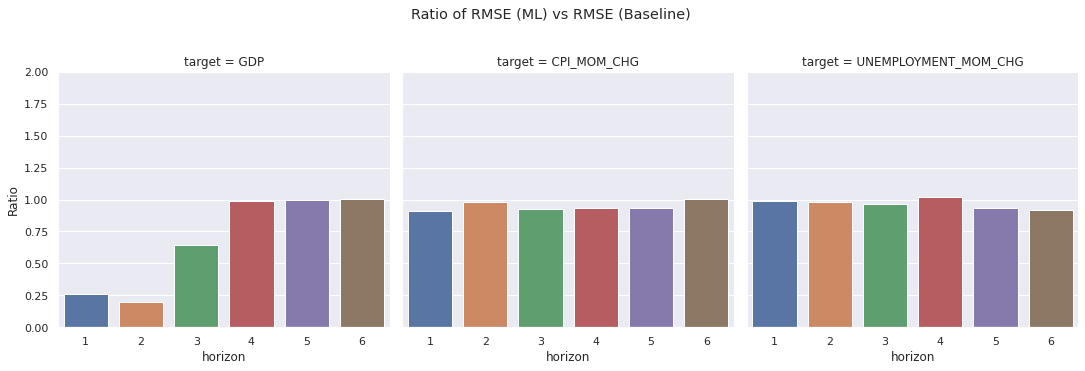

In [41]:
subset_df = comparison_df.loc[(["GDP", "CPI_MOM_CHG", "UNEMPLOYMENT_MOM_CHG"], [1,2,3,4,5,6])]
g = sns.catplot(x="horizon"
                ,y="Ratio"
                ,data=subset_df.reset_index()
                ,col="target"
                ,kind="bar"
                ,sharey=True
               ,facet_kws={"ylim":(0,2),})

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of RMSE (ML) vs RMSE (Baseline)")
